In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import keras
from keras.layers import Embedding
from random import randrange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm 
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("merged.csv", sep=",", header=None, engine='python') 

In [3]:
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df.head(10)

0  Index  Year                 Name        College_x POS_x Height Weight  \
1     70  2011            J.J. Watt        Wisconsin    DE   77.4    290   
2   1980  1988       Thurman Thomas   Oklahoma State    RB   69.9    198   
3   5294  2011           Cam Newton           Auburn    QB     77    248   
4    792  2001  LaDainian Tomlinson  Texas Christian    RB   70.3    221   
5   2934  2007       Patrick Willis      Mississippi    LB   73.1    242   
6   1052  1998       Peyton Manning        Tennessee    QB   77.3    230   
7   2258  1991        Ricky Watters       Notre Dame    RB     73    212   
8   3219  1996            Ray Lewis       Miami (FL)    LB   72.4    235   
9   3391  1998           Randy Moss    Marshall (WV)    WR   75.6    194   
10  3266  1999       Edgerrin James       Miami (FL)    RB     72    216   

0  HandSize ArmLength Wonderlic Forty BenchPress VerticalJump BroadJump  \
1      11.1        34       NaN  4.81         34           37       120   
2       8.8       NaN       NaN  4.47         13           33       114   
3       9.9      33.8        21  4.56        NaN           35       126   
4         9        31       NaN  4.43         18         40.5       124   
5       9.8        34       NaN  4.53         22           39       119   
6      10.1      31.5       NaN   NaN        NaN          NaN       NaN   
7       9.1      31.5       NaN  4.71         18         34.5       111   
8       9.4      34.1       NaN   NaN        NaN          NaN       NaN   
9       9.6        34        17  4.38        NaN           33       117   
10      8.9        30       NaN  4.38        NaN          NaN       NaN   

0  Shuttle  Cone 60YdShuttle    College_y Round Pick Team Player_Id HOF POS_y  \
1     4.21  6.88         NaN    Wisconsin     1   11  HOU  WattJ.00  No    DE   
2     4.21   NaN       11.39          NaN     2   40  BUF  ThomTh00  No    RB   
3     4.18  6.92         NaN       Auburn     1    1  CAR  NewtCa00  No    QB   
4     4.21  6.84       11.19          TCU     1    5  SDG  TomlLa00  No    RB   
5     4.46  7.23        11.9  Mississippi     1   11  SFO  WillPa98  No    LB   
6      NaN   NaN         NaN    Tennessee     1    1  IND  MannPe00  No    QB   
7     4.41   NaN       11.59          NaN     2   45  SFO  WattRi00  No    RB   
8      NaN   NaN         NaN   Miami (FL)     1   26  BAL  LewiRa00  No    LB   
9     4.17  7.19       11.87     Marshall     1   21  MIN  MossRa00  No    WR   
10    3.88  6.87         NaN   Miami (FL)     1    4  IND  JameEd00  No    RB   

0  PositionStandard  AV Age    To AP1  PB  St CarAV DrAV    G   Cmp Pass_Att  \
1                DE  88  22  2016   4   4   5    81   81   83   NaN      NaN   
2                RB  84  22  2000   2   5  10   112  111  182     0        1   
3                QB  83  22  2016   1   3   5    76   76   87  1615     2728   
4                RB  80  22  2011   3   5  10   128  121  170     8       12   
5                LB  79  22  2014   5   7   7    92   92  112   NaN      NaN   
6                QB  76  22  2015   7  14  17   177  145  266  6125     9380   
7                RB  74  22  2001   0   5   8   102   45  144     1        2   
8                LB  74  21  2012   7  13  14   160  160  228   NaN      NaN   
9                WR  73  21  2012   4   6  12   123   79  218     4        8   
10               RB  73  21  2009   1   4   8   114   98  148   NaN      NaN   

0  Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds Rec_Tds  \
1       NaN     NaN      NaN      NaN      NaN      NaN    3       4       3   
2         0       0        0     2877    12074       65  472    4458      23   
3     20449     128       71      661     3475       47    1      33       0   
4       143       7        0     3174    13684      145  624    4772      17   
5       NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN     NaN   
6     71940     539      251      431      667       18    1      -2       0   
7   

In [4]:
df.isnull().sum()

0
Index                  0
Year                   0
Name                   0
College_x              0
POS_x                  0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [5]:
df['Pick'] = df.Pick.fillna(260)

In [6]:
#df['Round'] = df.Round.replace(np.nan, 'Undrafted', regex=True)
#df['Round'] = df.Round.fillna(8)

In [7]:
df['Team'] = df.Team.replace(np.nan, 'Free Agent', regex=True)

In [8]:
df.isnull().sum()

0
Index                  0
Year                   0
Name                   0
College_x              0
POS_x                  0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [9]:
df.head(5)

0 Index  Year                 Name        College_x POS_x Height Weight  \
1    70  2011            J.J. Watt        Wisconsin    DE   77.4    290   
2  1980  1988       Thurman Thomas   Oklahoma State    RB   69.9    198   
3  5294  2011           Cam Newton           Auburn    QB     77    248   
4   792  2001  LaDainian Tomlinson  Texas Christian    RB   70.3    221   
5  2934  2007       Patrick Willis      Mississippi    LB   73.1    242   

0 HandSize ArmLength Wonderlic Forty BenchPress VerticalJump BroadJump  \
1     11.1        34       NaN  4.81         34           37       120   
2      8.8       NaN       NaN  4.47         13           33       114   
3      9.9      33.8        21  4.56        NaN           35       126   
4        9        31       NaN  4.43         18         40.5       124   
5      9.8        34       NaN  4.53         22           39       119   

0 Shuttle  Cone 60YdShuttle    College_y Round Pick Team Player_Id HOF POS_y  \
1    4.21  6.88         NaN    Wisconsin     1   11  HOU  WattJ.00  No    DE   
2    4.21   NaN       11.39          NaN     2   40  BUF  ThomTh00  No    RB   
3    4.18  6.92         NaN       Auburn     1    1  CAR  NewtCa00  No    QB   
4    4.21  6.84       11.19          TCU     1    5  SDG  TomlLa00  No    RB   
5    4.46  7.23        11.9  Mississippi     1   11  SFO  WillPa98  No    LB   

0 PositionStandard  AV Age    To AP1 PB  St CarAV DrAV    G   Cmp Pass_Att  \
1               DE  88  22  2016   4  4   5    81   81   83   NaN      NaN   
2               RB  84  22  2000   2  5  10   112  111  182     0        1   
3               QB  83  22  2016   1  3   5    76   76   87  1615     2728   
4               RB  80  22  2011   3  5  10   128  121  170     8       12   
5               LB  79  22  2014   5  7   7    92   92  112   NaN      NaN   

0 Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds Rec_Tds  \
1      NaN     NaN      NaN      NaN      NaN      NaN    3       4       3   
2        0       0        0     2877    12074       65  472    4458      23   
3    20449     128       71      661     3475       47    1      33       0   
4      143       7        0     3174    13684      145  624    4772      17   
5      NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN     NaN   

0  Tkl Def_Int            Sk  
1  299       1            76  
2  NaN     NaN  Oklahoma St.  
3    6     NaN           NaN  
4    8     NaN           NaN  
5  732       8          20.5

In [10]:
#df = df.dropna(axis=1)
#df3.head(5)

In [11]:
# Cleaning Check
#df.isnull().sum()

In [12]:
df.dtypes

0
Index               object
Year                object
Name                object
College_x           object
POS_x               object
Height              object
Weight              object
HandSize            object
ArmLength           object
Wonderlic           object
Forty               object
BenchPress          object
VerticalJump        object
BroadJump           object
Shuttle             object
Cone                object
60YdShuttle         object
College_y           object
Round               object
Pick                object
Team                object
Player_Id           object
HOF                 object
POS_y               object
PositionStandard    object
AV                  object
Age                 object
To                  object
AP1                 object
PB                  object
St                  object
CarAV               object
DrAV                object
G                   object
Cmp                 object
Pass_Att            object
Pass_Yds            object

In [13]:
df["Forty"] = df.Forty.astype(float)
df["VerticalJump"] = df.VerticalJump.astype(float)
df["BenchPress"] = df.BenchPress.astype(float)
df["BroadJump"] = df.BroadJump.astype(float)
df["Cone"] = df.Cone.astype(float)
df["Shuttle"] = df.Shuttle.astype(float)
df["Round"] = df.Round.astype(float)
df["Pick"] = df.Pick.astype(float)
df["Year"] = df.Year.astype(int)
df["Height"] = df.Height.astype(float)
df["Weight"] = df.Weight.astype(int)
df["AV"] = df.AV.astype(float)

In [14]:
df.dtypes

0
Index                object
Year                  int32
Name                 object
College_x            object
POS_x                object
Height              float64
Weight                int32
HandSize             object
ArmLength            object
Wonderlic            object
Forty               float64
BenchPress          float64
VerticalJump        float64
BroadJump           float64
Shuttle             float64
Cone                float64
60YdShuttle          object
College_y            object
Round               float64
Pick                float64
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                  float64
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [15]:
df.isna().sum()

0
Index                  0
Year                   0
Name                   0
College_x              0
POS_x                  0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [16]:
train = df
test = df.drop(columns = ['Pick'], axis = 1)

In [17]:
train_original = train.copy()
test_original = test.copy()

In [18]:
train.columns

Index(['Index', 'Year', 'Name', 'College_x', 'POS_x', 'Height', 'Weight',
       'HandSize', 'ArmLength', 'Wonderlic', 'Forty', 'BenchPress',
       'VerticalJump', 'BroadJump', 'Shuttle', 'Cone', '60YdShuttle',
       'College_y', 'Round', 'Pick', 'Team', 'Player_Id', 'HOF', 'POS_y',
       'PositionStandard', 'AV', 'Age', 'To', 'AP1', 'PB', 'St', 'CarAV',
       'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int',
       'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl',
       'Def_Int', 'Sk'],
      dtype='object', name=0)

In [19]:
test.columns

Index(['Index', 'Year', 'Name', 'College_x', 'POS_x', 'Height', 'Weight',
       'HandSize', 'ArmLength', 'Wonderlic', 'Forty', 'BenchPress',
       'VerticalJump', 'BroadJump', 'Shuttle', 'Cone', '60YdShuttle',
       'College_y', 'Round', 'Team', 'Player_Id', 'HOF', 'POS_y',
       'PositionStandard', 'AV', 'Age', 'To', 'AP1', 'PB', 'St', 'CarAV',
       'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int',
       'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl',
       'Def_Int', 'Sk'],
      dtype='object', name=0)

In [20]:
print('Training data shape: ', train.shape)
train.head(5)

Training data shape:  (5647, 48)


0 Index  Year                 Name        College_x POS_x  Height  Weight  \
1    70  2011            J.J. Watt        Wisconsin    DE    77.4     290   
2  1980  1988       Thurman Thomas   Oklahoma State    RB    69.9     198   
3  5294  2011           Cam Newton           Auburn    QB    77.0     248   
4   792  2001  LaDainian Tomlinson  Texas Christian    RB    70.3     221   
5  2934  2007       Patrick Willis      Mississippi    LB    73.1     242   

0 HandSize ArmLength Wonderlic  Forty  BenchPress  VerticalJump  BroadJump  \
1     11.1        34       NaN   4.81        34.0          37.0      120.0   
2      8.8       NaN       NaN   4.47        13.0          33.0      114.0   
3      9.9      33.8        21   4.56         NaN          35.0      126.0   
4        9        31       NaN   4.43        18.0          40.5      124.0   
5      9.8        34       NaN   4.53        22.0          39.0      119.0   

0  Shuttle  Cone 60YdShuttle    College_y  Round  Pick Team Player_Id HOF  \
1     4.21  6.88         NaN    Wisconsin    1.0  11.0  HOU  WattJ.00  No   
2     4.21   NaN       11.39          NaN    2.0  40.0  BUF  ThomTh00  No   
3     4.18  6.92         NaN       Auburn    1.0   1.0  CAR  NewtCa00  No   
4     4.21  6.84       11.19          TCU    1.0   5.0  SDG  TomlLa00  No   
5     4.46  7.23        11.9  Mississippi    1.0  11.0  SFO  WillPa98  No   

0 POS_y PositionStandard    AV Age    To AP1 PB  St CarAV DrAV    G   Cmp  \
1    DE               DE  88.0  22  2016   4  4   5    81   81   83   NaN   
2    RB               RB  84.0  22  2000   2  5  10   112  111  182     0   
3    QB               QB  83.0  22  2016   1  3   5    76   76   87  1615   
4    RB               RB  80.0  22  2011   3  5  10   128  121  170     8   
5    LB               LB  79.0  22  2014   5  7   7    92   92  112   NaN   

0 Pass_Att Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds  \
1      NaN      NaN     NaN      NaN      NaN      NaN      NaN    3       4   
2        1        0       0        0     2877    12074       65  472    4458   
3     2728    20449     128       71      661     3475       47    1      33   
4       12      143       7        0     3174    13684      145  624    4772   
5      NaN      NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN   

0 Rec_Tds  Tkl Def_Int            Sk  
1       3  299       1            76  
2      23  NaN     NaN  Oklahoma St.  
3       0    6     NaN           NaN  
4      17    8     NaN           NaN  
5     NaN  732       8          20.5

In [21]:
print('Test data shape: ', test.shape)
test.head(5)

Test data shape:  (5647, 47)


0 Index  Year                 Name        College_x POS_x  Height  Weight  \
1    70  2011            J.J. Watt        Wisconsin    DE    77.4     290   
2  1980  1988       Thurman Thomas   Oklahoma State    RB    69.9     198   
3  5294  2011           Cam Newton           Auburn    QB    77.0     248   
4   792  2001  LaDainian Tomlinson  Texas Christian    RB    70.3     221   
5  2934  2007       Patrick Willis      Mississippi    LB    73.1     242   

0 HandSize ArmLength Wonderlic  Forty  BenchPress  VerticalJump  BroadJump  \
1     11.1        34       NaN   4.81        34.0          37.0      120.0   
2      8.8       NaN       NaN   4.47        13.0          33.0      114.0   
3      9.9      33.8        21   4.56         NaN          35.0      126.0   
4        9        31       NaN   4.43        18.0          40.5      124.0   
5      9.8        34       NaN   4.53        22.0          39.0      119.0   

0  Shuttle  Cone 60YdShuttle    College_y  Round Team Player_Id HOF POS_y  \
1     4.21  6.88         NaN    Wisconsin    1.0  HOU  WattJ.00  No    DE   
2     4.21   NaN       11.39          NaN    2.0  BUF  ThomTh00  No    RB   
3     4.18  6.92         NaN       Auburn    1.0  CAR  NewtCa00  No    QB   
4     4.21  6.84       11.19          TCU    1.0  SDG  TomlLa00  No    RB   
5     4.46  7.23        11.9  Mississippi    1.0  SFO  WillPa98  No    LB   

0 PositionStandard    AV Age    To AP1 PB  St CarAV DrAV    G   Cmp Pass_Att  \
1               DE  88.0  22  2016   4  4   5    81   81   83   NaN      NaN   
2               RB  84.0  22  2000   2  5  10   112  111  182     0        1   
3               QB  83.0  22  2016   1  3   5    76   76   87  1615     2728   
4               RB  80.0  22  2011   3  5  10   128  121  170     8       12   
5               LB  79.0  22  2014   5  7   7    92   92  112   NaN      NaN   

0 Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds Rec_Tds  \
1      NaN     NaN      NaN      NaN      NaN      NaN    3       4       3   
2        0       0        0     2877    12074       65  472    4458      23   
3    20449     128       71      661     3475       47    1      33       0   
4      143       7        0     3174    13684      145  624    4772      17   
5      NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN     NaN   

0  Tkl Def_Int            Sk  
1  299       1            76  
2  NaN     NaN  Oklahoma St.  
3    6     NaN           NaN  
4    8     NaN           NaN  
5  732       8          20.5

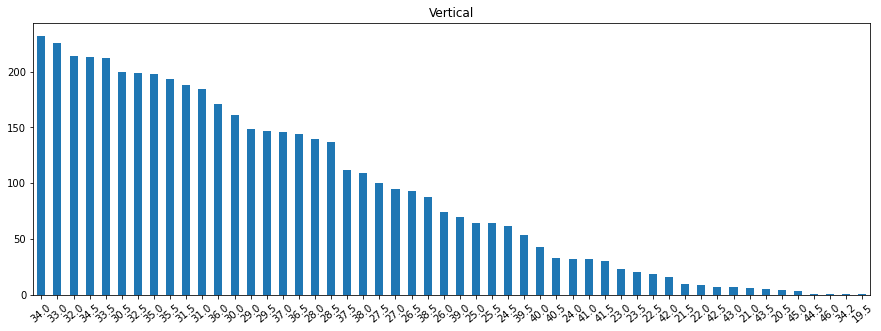

In [22]:
train['VerticalJump'].value_counts(normalize=False).plot.bar(title= 'Vertical', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

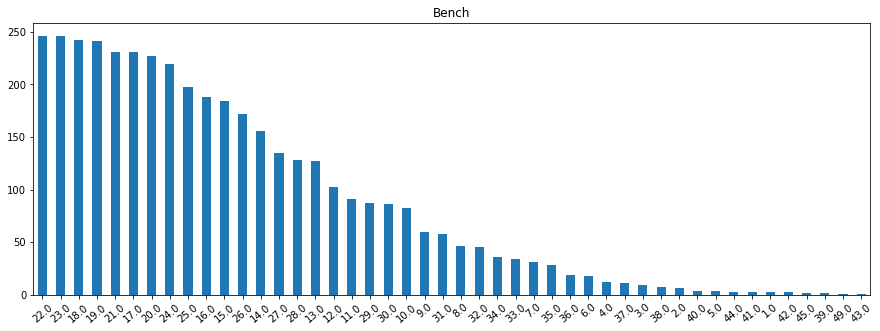

In [23]:
train['BenchPress'].value_counts(normalize=False).plot.bar(title= 'Bench', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

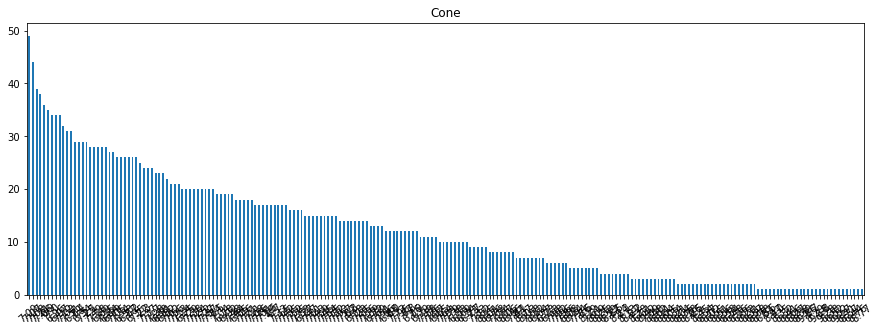

In [24]:
train['Cone'].value_counts(normalize=False).plot.bar(title= 'Cone', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

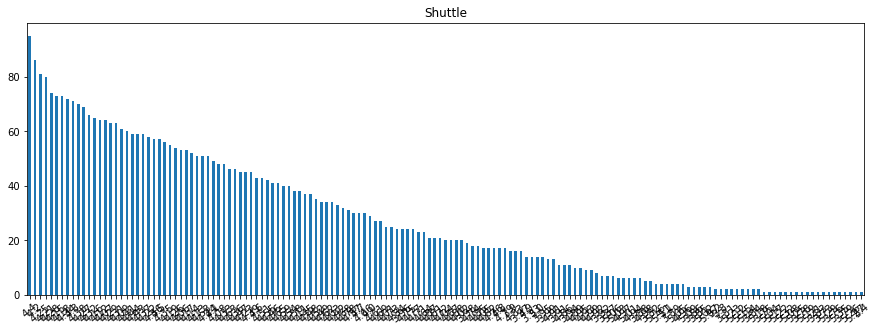

In [25]:
train['Shuttle'].value_counts(normalize=False).plot.bar(title= 'Shuttle', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

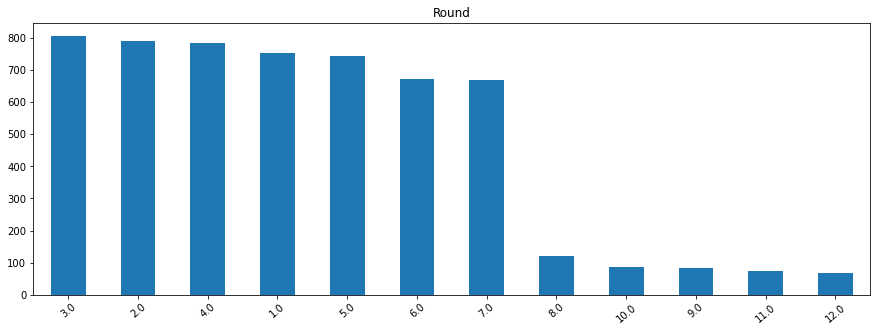

In [26]:
train['Round'].value_counts(normalize=False).plot.bar(title= 'Round', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

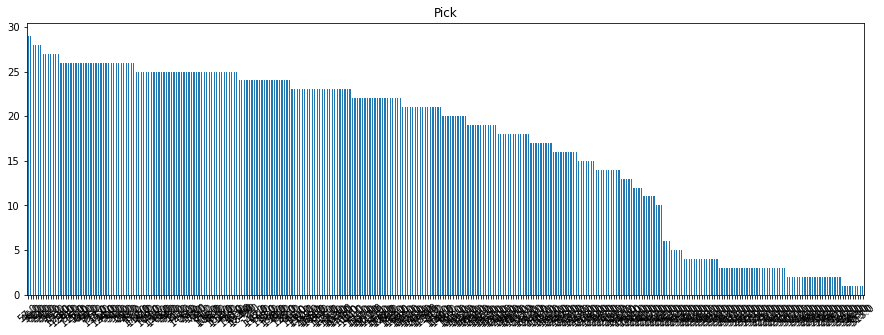

In [27]:
train['Pick'].value_counts(normalize=False).plot.bar(title= 'Pick', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

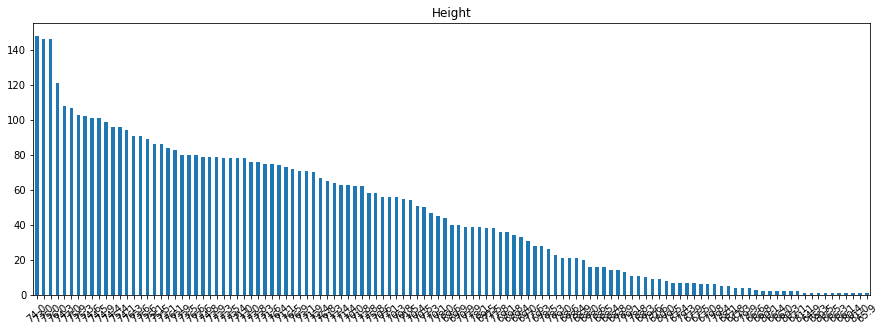

In [28]:
train['Height'].value_counts(normalize=False).plot.bar(title= 'Height', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

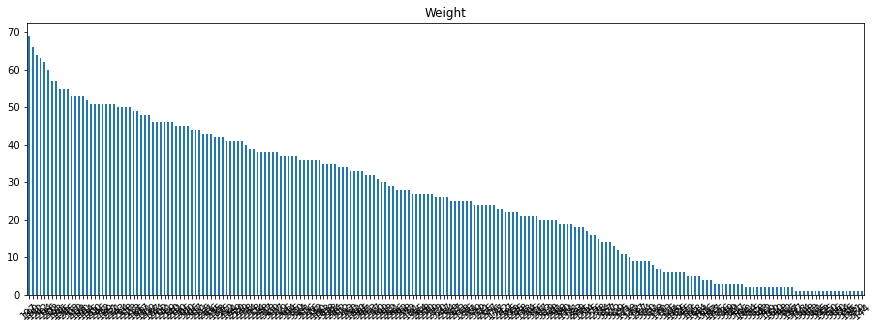

In [29]:
train['Weight'].value_counts(normalize=False).plot.bar(title= 'Weight', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

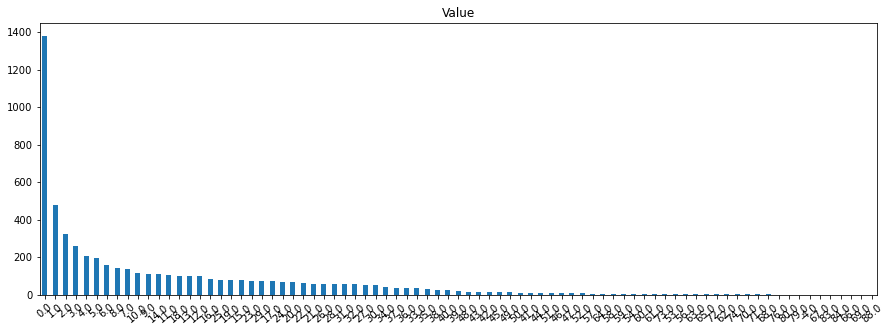

In [30]:
train['AV'].value_counts(normalize=False).plot.bar(title= 'Value', figsize=(15,5))
plt.xticks(rotation=40)
plt.show()

In [31]:
train["Pick"].size

5647

In [32]:
train["Pick"].value_counts()

57.0     29
46.0     29
39.0     28
82.0     28
52.0     28
23.0     28
54.0     27
27.0     27
32.0     27
96.0     27
15.0     27
71.0     27
123.0    27
73.0     26
128.0    26
56.0     26
70.0     26
51.0     26
115.0    26
25.0     26
35.0     26
19.0     26
66.0     26
43.0     26
94.0     26
37.0     26
95.0     26
133.0    26
17.0     26
75.0     26
124.0    26
44.0     26
62.0     26
50.0     26
30.0     26
31.0     26
36.0     26
10.0     26
20.0     26
22.0     26
76.0     26
48.0     26
13.0     26
171.0    25
116.0    25
67.0     25
97.0     25
84.0     25
109.0    25
89.0     25
49.0     25
137.0    25
140.0    25
65.0     25
55.0     25
29.0     25
34.0     25
93.0     25
38.0     25
11.0     25
41.0     25
147.0    25
1.0      25
26.0     25
28.0     25
14.0     25
18.0     25
72.0     25
8.0      25
64.0     25
79.0     25
104.0    25
106.0    25
92.0     25
88.0     25
60.0     25
101.0    25
114.0    25
53.0     25
47.0     25
61.0     25
110.0    25
45.0     25
81.0

In [33]:
# Normalize can be set to True to print proportions instead of number 
train["Pick"].value_counts(normalize=True)*100

57.0     0.513547
46.0     0.513547
39.0     0.495838
82.0     0.495838
52.0     0.495838
23.0     0.495838
54.0     0.478130
27.0     0.478130
32.0     0.478130
96.0     0.478130
15.0     0.478130
71.0     0.478130
123.0    0.478130
73.0     0.460421
128.0    0.460421
56.0     0.460421
70.0     0.460421
51.0     0.460421
115.0    0.460421
25.0     0.460421
35.0     0.460421
19.0     0.460421
66.0     0.460421
43.0     0.460421
94.0     0.460421
37.0     0.460421
95.0     0.460421
133.0    0.460421
17.0     0.460421
75.0     0.460421
124.0    0.460421
44.0     0.460421
62.0     0.460421
50.0     0.460421
30.0     0.460421
31.0     0.460421
36.0     0.460421
10.0     0.460421
20.0     0.460421
22.0     0.460421
76.0     0.460421
48.0     0.460421
13.0     0.460421
171.0    0.442713
116.0    0.442713
67.0     0.442713
97.0     0.442713
84.0     0.442713
109.0    0.442713
89.0     0.442713
49.0     0.442713
137.0    0.442713
140.0    0.442713
65.0     0.442713
55.0     0.442713
29.0     0

Text(0.5, 1.0, 'Ht vs. Wt')

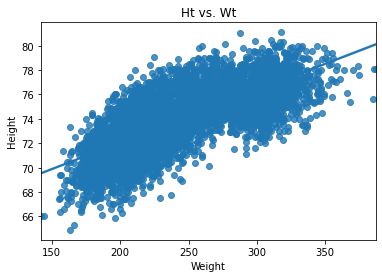

In [34]:
# Height vs Weight
sns.regplot(x='Weight',y='Height',data=df)
plt.title('Ht vs. Wt')

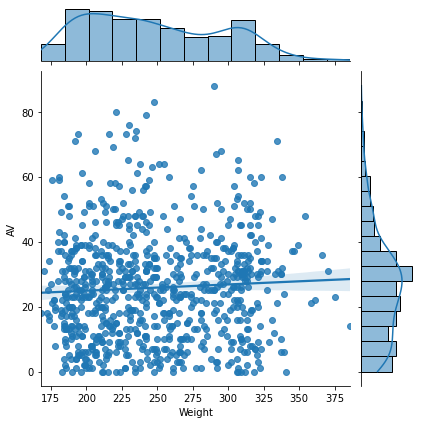

In [35]:
activeqb = df[df['Pick'] < 33]

def r2(Height, Weight):
    return stats.pearsonr(Heightt, AV)[0] ** 2
sns.jointplot(x='Weight',y='AV',data=activeqb, kind="reg")
#sns.jointplot(x='Ht',y='AV',data=activeqb, kind="reg", stat_func=r2)

In [36]:
train["Forty"].value_counts()

4.59    104
4.56    102
4.53     99
4.62     98
4.65     98
4.55     95
4.61     94
4.52     94
4.50     94
4.60     86
4.58     83
4.57     81
4.49     80
4.63     79
4.68     76
4.54     75
4.46     75
4.64     71
4.71     69
4.84     64
4.51     64
4.69     63
4.48     63
4.67     61
4.47     60
4.83     59
4.75     59
4.76     57
4.44     56
4.43     56
4.78     56
4.79     55
4.45     54
4.74     54
4.66     52
4.86     52
4.77     51
5.18     51
4.85     51
5.14     49
4.72     49
4.89     49
4.73     48
4.96     47
4.70     47
4.81     46
4.40     46
5.12     45
4.88     45
5.07     44
4.82     43
4.80     43
4.90     42
4.93     42
4.42     41
4.94     40
5.19     39
4.41     39
5.09     39
4.92     37
5.08     37
4.95     37
4.97     36
5.28     36
4.91     34
5.30     34
4.87     33
5.03     33
5.24     32
5.06     32
5.05     31
5.21     31
5.11     30
4.99     29
5.33     29
5.25     28
5.29     28
4.38     28
5.00     27
5.04     27
5.02     27
5.22     26
5.20     26
5.10

In [37]:
train["Forty"].round(2)

1       4.81
2       4.47
3       4.56
4       4.43
5       4.53
6        NaN
7       4.71
8        NaN
9       4.38
10      4.38
11      4.94
12      4.58
13      4.54
14       NaN
15      4.44
16      4.72
17      4.53
18      4.31
19      4.95
20       NaN
21      5.12
22      4.46
23      4.71
24      5.03
25      4.85
26       NaN
27      4.61
28      4.59
29      4.52
30      4.60
31       NaN
32      4.42
33       NaN
34      5.14
35      4.78
36      4.30
37      4.86
38      4.83
39      4.46
40      5.23
41      4.61
42      5.18
43      4.96
44       NaN
45       NaN
46       NaN
47      4.67
48      4.56
49      5.21
50      5.12
51      4.41
52      4.43
53      4.34
54      5.08
55      4.64
56      4.84
57      4.75
58      4.76
59      4.58
60      4.65
61      5.26
62      4.62
63       NaN
64      4.28
65      4.58
66      4.60
67      5.08
68      4.96
69      4.33
70      4.87
71      4.33
72      4.86
73      4.63
74       NaN
75      4.68
76      5.14
77      4.81

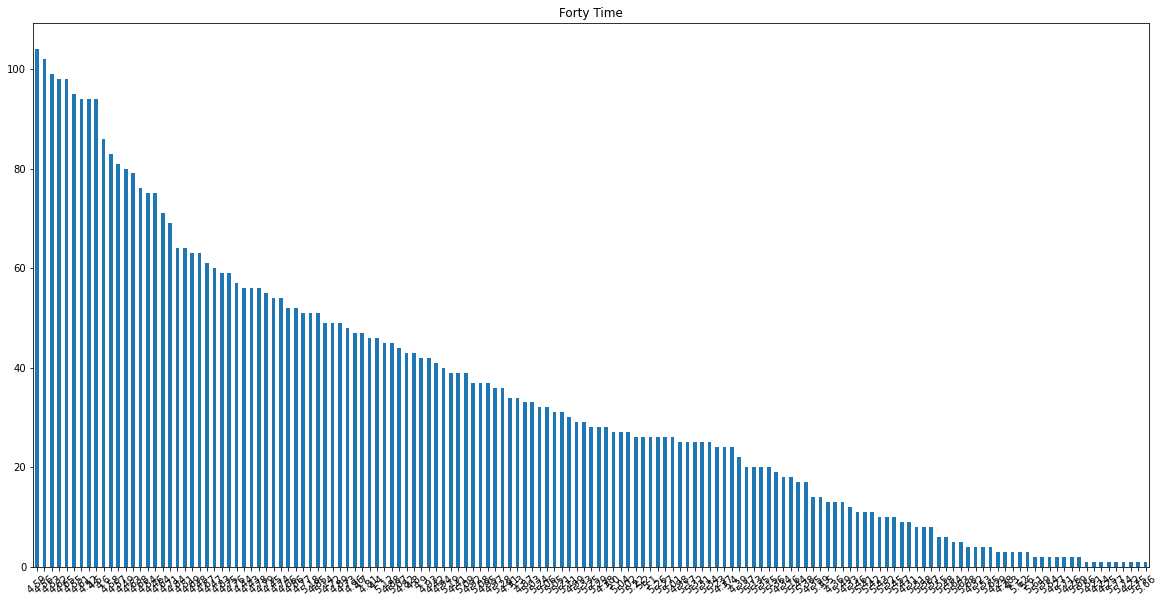

In [38]:
train['Forty'].value_counts(normalize=False).plot.bar(title= 'Forty Time', figsize=(20,10))
plt.xticks(rotation=40)
plt.show()

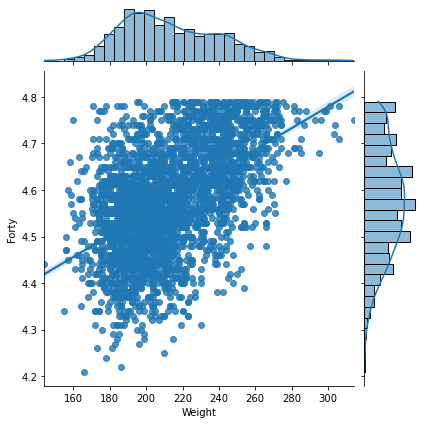

In [39]:
activeqb = df[df['Forty'] < 4.8] # looks at players on the more speeder side

def r2(Ht, AV):
    return stats.pearsonr(Weight, Forty)[0] ** 2
sns.jointplot(x='Weight',y='Forty',data=activeqb, kind="reg")
#sns.jointplot(x='Ht',y='AV',data=activeqb, kind="reg", stat_func=r2)

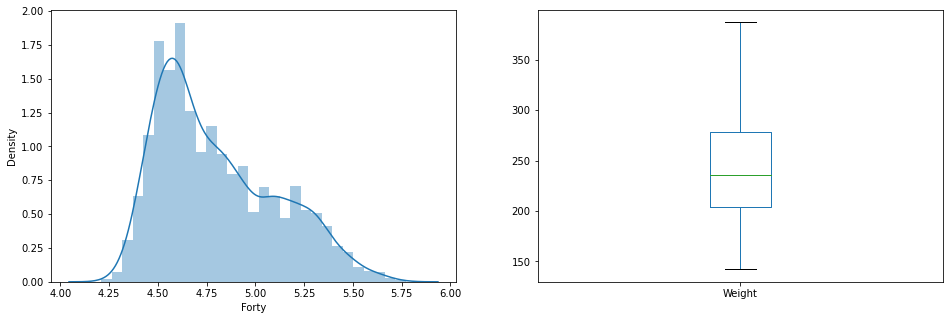

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["Forty"]);

plt.subplot(122)
train["Weight"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 1.0, 'Cor Plot')

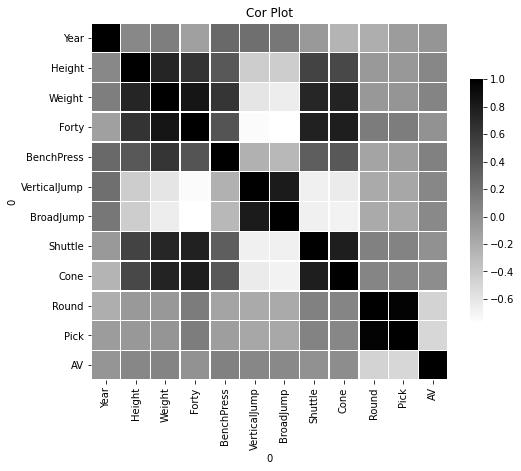

In [41]:
plt.figure(figsize=(8,9))
corr = df.corr()
sns.heatmap(corr,square=True,linewidths=.5, cbar_kws={"shrink": .5},cmap="binary")
plt.title('Cor Plot')

Text(0.5, 1.0, 'Picks by Round')

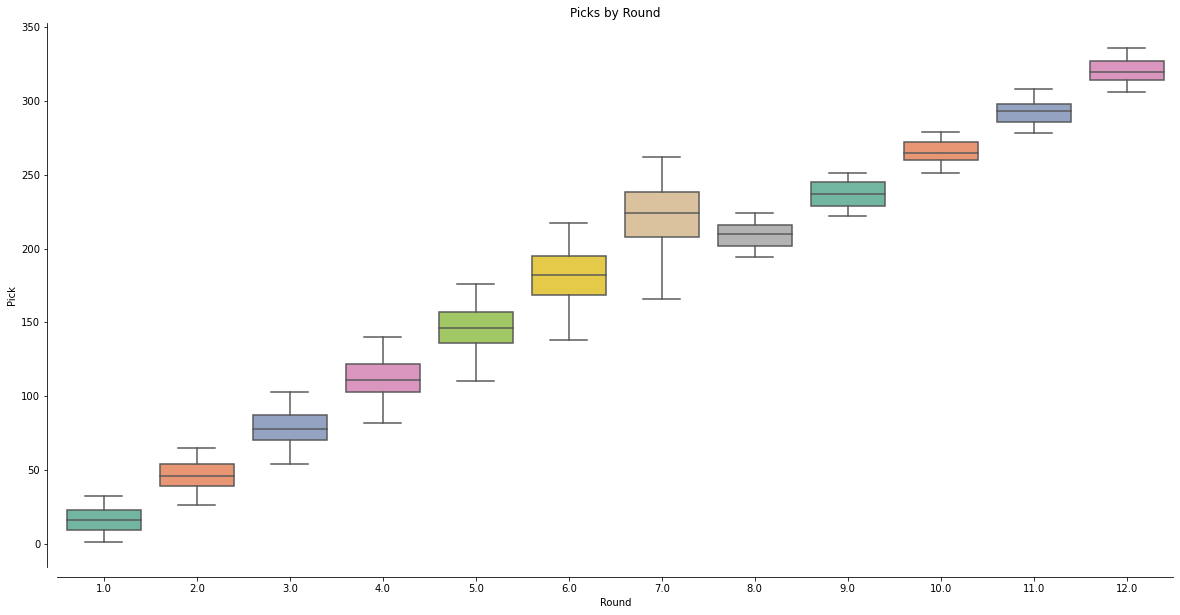

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Round',y='Pick',data=df,palette="Set2")
sns.despine(offset=10, trim=False)
plt.title('Picks by Round')

Text(0.5, 1.0, 'Drafted Positions')

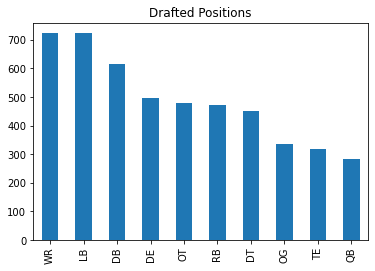

In [43]:
df.POS_x.value_counts().iloc[:10].plot(kind='bar')
plt.title('Drafted Positions')

In [44]:
oline = df[(df['POS_x'] == 'OT') | (df['POS_x'] == 'OG') | (df['POS_x'] == 'C')]
dline = df[(df['POS_x'] == 'EDGE') | (df['POS_x'] == 'NT') | (df['POS_x'] == 'DT') | (df['POS_x'] == 'DE')]
skill = df[(df['POS_x'] == 'QB') | (df['POS_x'] == 'RB') | (df['POS_x']=='WR') | (df['POS_x'] == 'TE') | (df['POS_x'] == 'FB')]
special = df[(df['POS_x'] == 'K') | (df['POS_x'] == 'P') | (df['POS_x']=='LS')]
db = df[(df['POS_x'] == 'SS') | (df['POS_x'] == 'FS') | (df['POS_x']=='S') | (df['POS_x'] == 'CB') | (df['POS_x'] == 'DB')]
lb = df[(df['POS_x'] == 'OLB') | (df['POS_x'] == 'ILB') | (df['POS_x']=='LB')]

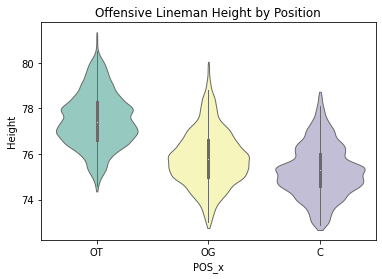

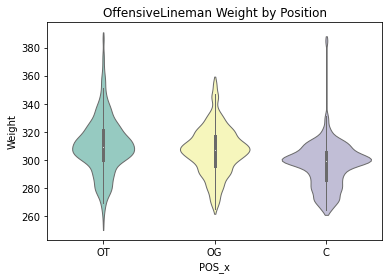

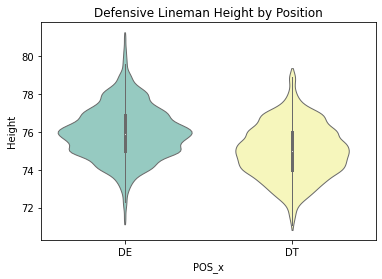

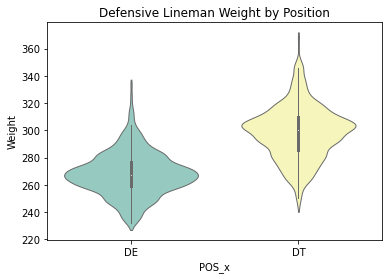

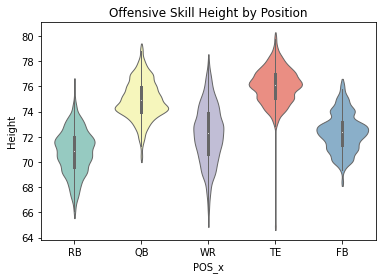

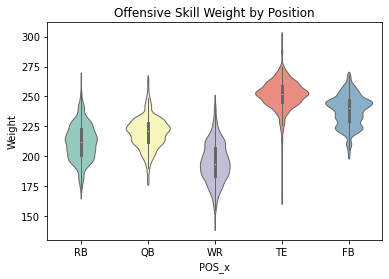

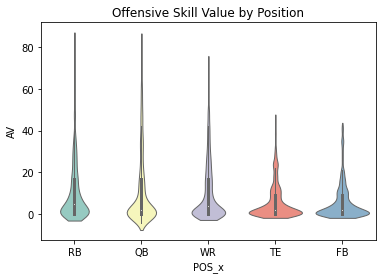

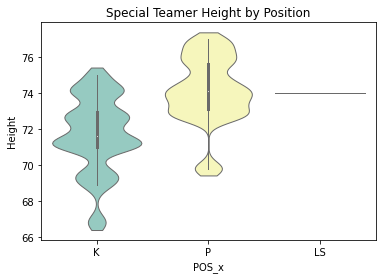

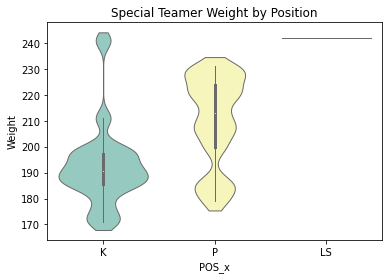

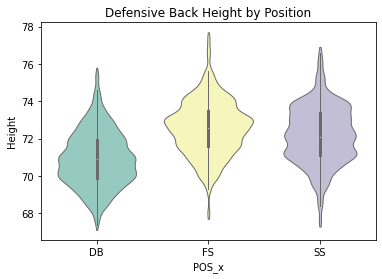

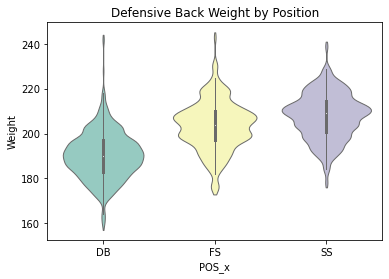

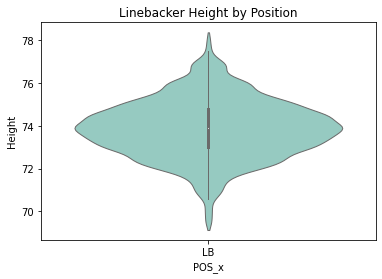

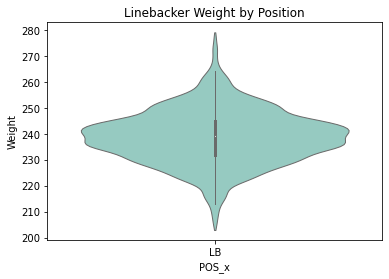

In [45]:
sns.violinplot(x='POS_x',y='Height',data=oline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Lineman Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=oline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('OffensiveLineman Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=dline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Lineman Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=dline,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Lineman Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=skill,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Skill Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=skill,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Skill Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='AV',data=skill,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Offensive Skill Value by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=special,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Special Teamer Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=special,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Special Teamer Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=db,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Back Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=db,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Defensive Back Weight by Position')
plt.show()
sns.violinplot(x='POS_x',y='Height',data=lb,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Linebacker Height by Position')
plt.show()
sns.violinplot(x='POS_x',y='Weight',data=lb,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Linebacker Weight by Position')
plt.show()

In [46]:
# Filling Combine Drill Stats with the median value if NaN
df['Forty']=df.groupby(["POS_x"]).Forty.apply(lambda x: x.fillna(x.mean()))
df['VerticalJump']=df.groupby(["POS_x"]).VerticalJump.apply(lambda x: x.fillna(x.mean()))
df['BenchPress']=df.groupby(["POS_x"]).BenchPress.apply(lambda x: x.fillna(x.mean()))
df['BroadJump']=df.groupby(["POS_x"]).BroadJump.apply(lambda x: x.fillna(x.mean()))
df['Cone']=df.groupby(["POS_x"]).Cone.apply(lambda x: x.fillna(x.mean()))
df['Shuttle']=df.groupby(["POS_x"]).Shuttle.apply(lambda x: x.fillna(x.mean()))
df['Pick']= df['Pick'].astype(int)

In [47]:
df.head(10)

0  Index  Year                 Name        College_x POS_x  Height  Weight  \
1     70  2011            J.J. Watt        Wisconsin    DE    77.4     290   
2   1980  1988       Thurman Thomas   Oklahoma State    RB    69.9     198   
3   5294  2011           Cam Newton           Auburn    QB    77.0     248   
4    792  2001  LaDainian Tomlinson  Texas Christian    RB    70.3     221   
5   2934  2007       Patrick Willis      Mississippi    LB    73.1     242   
6   1052  1998       Peyton Manning        Tennessee    QB    77.3     230   
7   2258  1991        Ricky Watters       Notre Dame    RB    73.0     212   
8   3219  1996            Ray Lewis       Miami (FL)    LB    72.4     235   
9   3391  1998           Randy Moss    Marshall (WV)    WR    75.6     194   
10  3266  1999       Edgerrin James       Miami (FL)    RB    72.0     216   

0  HandSize ArmLength Wonderlic    Forty  BenchPress  VerticalJump  \
1      11.1        34       NaN  4.81000   34.000000     37.000000   
2       8.8       NaN       NaN  4.47000   13.000000     33.000000   
3       9.9      33.8        21  4.56000   14.294118     35.000000   
4         9        31       NaN  4.43000   18.000000     40.500000   
5       9.8        34       NaN  4.53000   22.000000     39.000000   
6      10.1      31.5       NaN  4.85512   14.294118     30.802691   
7       9.1      31.5       NaN  4.71000   18.000000     34.500000   
8       9.4      34.1       NaN  4.72762   21.534110     33.706954   
9       9.6        34        17  4.38000   14.124424     33.000000   
10      8.9        30       NaN  4.38000   18.256131     34.312500   

0    BroadJump   Shuttle      Cone 60YdShuttle    College_y  Round  Pick Team  \
1   120.000000  4.210000  6.880000         NaN    Wisconsin    1.0    11  HOU   
2   114.000000  4.210000  7.077433       11.39          NaN    2.0    40  BUF   
3   126.000000  4.180000  6.920000         NaN       Auburn    1.0     1  CAR   
4   124.000000  4.210000  6.840000       11.19          TCU    1.0     5  SDG   
5   119.000000  4.460000  7.230000        11.9  Mississippi    1.0    11  SFO   
6   108.968610  4.322558  7.183333         NaN    Tennessee    1.0     1  IND   
7   111.000000  4.410000  7.077433       11.59          NaN    2.0    45  SFO   
8   115.734219  4.298739  7.190523         NaN   Miami (FL)    1.0    26  BAL   
9   117.000000  4.170000  7.190000       11.87     Marshall    1.0    21  MIN   
10  117.362924  3.880000  6.870000         NaN   Miami (FL)    1.0     4  IND   

0  Player_Id HOF POS_y PositionStandard    AV Age    To AP1  PB  St CarAV  \
1   WattJ.00  No    DE               DE  88.0  22  2016   4   4   5    81   
2   ThomTh00  No    RB               RB  84.0  22  2000   2   5  10   112   
3   NewtCa00  No    QB               QB  83.0  22  2016   1   3   5    76   
4   TomlLa00  No    RB               RB  80.0  22  2011   3   5  10   128   
5   WillPa98  No    LB               LB  79.0  22  2014   5   7   7    92   
6   MannPe00  No    QB               QB  76.0  22  2015   7  14  17   177   
7   WattRi00  No    RB               RB  74.0  22  2001   0   5   8   102   
8   LewiRa00  No    LB               LB  74.0  21  2012   7  13  14   160   
9   MossRa00  No    WR               WR  73.0  21  2012   4   6  12   123   
10  JameEd00  No    RB               RB  73.0  21  2009   1   4   8   114   

0  DrAV    G   Cmp Pass_Att Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds  \
1    81   83   NaN      NaN      NaN     NaN      NaN      NaN      NaN   
2   111  182     0        1        0       0        0     2877    12074   
3    76   87  1615     2728    20449     128       71      661     3475   
4   121  170     8       12      143       7        0     3174    13684   
5    92  112   NaN      NaN      NaN     NaN      NaN      NaN      NaN   
6   145  266  6125     9380    71940     539      251      431      667   
7    45  144     1        2        1       1        0     2622    10643   
8   160  228   NaN      NaN   

In [48]:
df=df.dropna(subset=['Cone','Shuttle', 'Round'])

In [49]:
# linear regression predicting AV. 
X = df[['Height','Weight','Forty','VerticalJump','BenchPress','BroadJump','Cone','Shuttle','Year','AV', 'Round']]
Y = df[['Pick']]
   
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          3.780e+04
Date:                Mon, 01 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:05:27   Log-Likelihood:                         -23738.
No. Observations:                5615   AIC:                                  4.750e+04
Df Residuals:                    5604   BIC:                                  4.757e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height          -0.7595      0.129     -5.875      0.000      -1.013      -0.506
Weight           0.1934      0.014     13.607      0.000       0.166       0.221
Forty          -14.8991      1.882     -7.918      0.000     -18.588     -11.210
VerticalJump     0.4211      0.103      4.071      0.000       0.218       0.624
BenchPress       0.1628      0.053      3.098      0.002       0.060       0.266
BroadJump       -0.3238      0.049     -6.629      0.000      -0.420      -0.228
Cone            -3.9735      1.168     -3.401      0.001      -6.264      -1.683
Shuttle        -12.7202      1.658     -7.671      0.000     -15.971      -9.470
Year             0.0895      0.007     12.827      0.000       0.076       0.103
AV              -0.2622      0.019    -14.141      0.000      -0.299      -0.226
Round           30.1387      0.108    279.565      0.000      29.927      30.350
==============================================================================
Omnibus:                      118.203   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.082
Skew:                           0.343   Prob(JB):                     2.54e-28
Kurtosis:                       3.267   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X = df[['Height', 'Forty',  'Shuttle', 'Cone']]
Y = df[['Pick']]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              3668.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:05:27   Log-Likelihood:                         -32259.
No. Observations:                5615   AIC:                                  6.453e+04
Df Residuals:                    5611   BIC:                                  6.455e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Height        -2.2520      0.335     -6.716      0.000      -2.909      -1.595
Forty         70.7719      6.419     11.025      0.000      58.188      83.356
Shuttle       21.2826      7.215      2.950      0.003       7.138      35.427
Cone         -19.9143      4.930     -4.039      0.000     -29.580     -10.249
==============================================================================
Omnibus:                      357.231   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.054
Skew:                           0.346   Prob(JB):                     1.21e-47
Kurtosis:                       2.333   Cond. No.                         592.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df.head(10)

0  Index  Year                 Name        College_x POS_x  Height  Weight  \
1     70  2011            J.J. Watt        Wisconsin    DE    77.4     290   
2   1980  1988       Thurman Thomas   Oklahoma State    RB    69.9     198   
3   5294  2011           Cam Newton           Auburn    QB    77.0     248   
4    792  2001  LaDainian Tomlinson  Texas Christian    RB    70.3     221   
5   2934  2007       Patrick Willis      Mississippi    LB    73.1     242   
6   1052  1998       Peyton Manning        Tennessee    QB    77.3     230   
7   2258  1991        Ricky Watters       Notre Dame    RB    73.0     212   
8   3219  1996            Ray Lewis       Miami (FL)    LB    72.4     235   
9   3391  1998           Randy Moss    Marshall (WV)    WR    75.6     194   
10  3266  1999       Edgerrin James       Miami (FL)    RB    72.0     216   

0  HandSize ArmLength Wonderlic    Forty  BenchPress  VerticalJump  \
1      11.1        34       NaN  4.81000   34.000000     37.000000   
2       8.8       NaN       NaN  4.47000   13.000000     33.000000   
3       9.9      33.8        21  4.56000   14.294118     35.000000   
4         9        31       NaN  4.43000   18.000000     40.500000   
5       9.8        34       NaN  4.53000   22.000000     39.000000   
6      10.1      31.5       NaN  4.85512   14.294118     30.802691   
7       9.1      31.5       NaN  4.71000   18.000000     34.500000   
8       9.4      34.1       NaN  4.72762   21.534110     33.706954   
9       9.6        34        17  4.38000   14.124424     33.000000   
10      8.9        30       NaN  4.38000   18.256131     34.312500   

0    BroadJump   Shuttle      Cone 60YdShuttle    College_y  Round  Pick Team  \
1   120.000000  4.210000  6.880000         NaN    Wisconsin    1.0    11  HOU   
2   114.000000  4.210000  7.077433       11.39          NaN    2.0    40  BUF   
3   126.000000  4.180000  6.920000         NaN       Auburn    1.0     1  CAR   
4   124.000000  4.210000  6.840000       11.19          TCU    1.0     5  SDG   
5   119.000000  4.460000  7.230000        11.9  Mississippi    1.0    11  SFO   
6   108.968610  4.322558  7.183333         NaN    Tennessee    1.0     1  IND   
7   111.000000  4.410000  7.077433       11.59          NaN    2.0    45  SFO   
8   115.734219  4.298739  7.190523         NaN   Miami (FL)    1.0    26  BAL   
9   117.000000  4.170000  7.190000       11.87     Marshall    1.0    21  MIN   
10  117.362924  3.880000  6.870000         NaN   Miami (FL)    1.0     4  IND   

0  Player_Id HOF POS_y PositionStandard    AV Age    To AP1  PB  St CarAV  \
1   WattJ.00  No    DE               DE  88.0  22  2016   4   4   5    81   
2   ThomTh00  No    RB               RB  84.0  22  2000   2   5  10   112   
3   NewtCa00  No    QB               QB  83.0  22  2016   1   3   5    76   
4   TomlLa00  No    RB               RB  80.0  22  2011   3   5  10   128   
5   WillPa98  No    LB               LB  79.0  22  2014   5   7   7    92   
6   MannPe00  No    QB               QB  76.0  22  2015   7  14  17   177   
7   WattRi00  No    RB               RB  74.0  22  2001   0   5   8   102   
8   LewiRa00  No    LB               LB  74.0  21  2012   7  13  14   160   
9   MossRa00  No    WR               WR  73.0  21  2012   4   6  12   123   
10  JameEd00  No    RB               RB  73.0  21  2009   1   4   8   114   

0  DrAV    G   Cmp Pass_Att Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds  \
1    81   83   NaN      NaN      NaN     NaN      NaN      NaN      NaN   
2   111  182     0        1        0       0        0     2877    12074   
3    76   87  1615     2728    20449     128       71      661     3475   
4   121  170     8       12      143       7        0     3174    13684   
5    92  112   NaN      NaN      NaN     NaN      NaN      NaN      NaN   
6   145  266  6125     9380    71940     539      251      431      667   
7    45  144     1        2        1       1        0     2622    10643   
8   160  228   NaN      NaN   

In [52]:
# X_predict = df[['Wt','Vertical','Cone','Pick']]  
# y_predict = model.predict(X_predict)

# # Actual value over predicted value
# print(df['AV'] - y_predict)

In [53]:
The_GOAT=df[df['Name'] =='Tom Brady']
The_GOAT.head()

0  Index  Year       Name College_x POS_x  Height  Weight HandSize ArmLength  \
85  3088  2000  Tom Brady  Michigan    QB    76.4     211      9.4      32.8   

0  Wonderlic  Forty  BenchPress  VerticalJump  BroadJump  Shuttle  Cone  \
85        33    5.3   14.294118          24.5       99.0     4.38   7.2   

0  60YdShuttle College_y  Round  Pick Team Player_Id HOF POS_y  \
85         NaN  Michigan    6.0   199  NWE  BradTo00  No    QB   

0  PositionStandard    AV Age    To AP1  PB  St CarAV DrAV    G   Cmp  \
85               QB  51.0  23  2016   2  11  14   160  160  231  5098   

0  Pass_Att Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs Rec Rec_Yds  \
85     7998    59943     444      151      523      939       17   2      59   

0  Rec_Tds Tkl Def_Int   Sk  
85       0   9     NaN  NaN

In [54]:
X_predict = The_GOAT[['Height', 'Forty',  'Shuttle', 'Cone']]  
y_predict = model.predict(X_predict)

# Actual value over predicted value, results show that Lacy would have been predicted as the 60th Pick
The_GOAT['Pick'] - y_predict

85    46.124937
dtype: float64

In [55]:
PosQB=df[df['POS_x'] == 'QB']
# PosQB=PosQB[PosQB['AV'] > 0]
PosQB.sort_values('Name')

0    Index  Year                Name                   College_x POS_x  \
5557  5631  2014       A.J. McCarron                     Alabama    QB   
28     482  1999        Aaron Brooks                    Virginia    QB   
429   5011  2005       Aaron Rodgers                  California    QB   
5211  4404  2005    Adrian McPherson               Florida State    QB   
3976  1976  1999         Akili Smith                      Oregon    QB   
5296   238  2008          Alex Brink            Washington State    QB   
1788   564  2005          Alex Smith                        Utah    QB   
2091   565  2005          Alex Smith                        Utah    QB   
4718  1765  1993       Alex Van Pelt                  Pittsburgh    QB   
130   1284  2012         Andrew Luck                    Stanford    QB   
38     811  2011         Andy Dalton             Texas Christian    QB   
3010  4611  1989      Anthony Dilweg                        Duke    QB   
5437  1017  2012        B.J. Coleman       Tennessee-Chattanooga    QB   
57    3187  2004  Ben Roethlisberger                  Miami (OH)    QB   
4546  1972  1991       Bill Musgrave                      Oregon    QB   
4291  3646  1987       Bill Ransdell                    Kentucky    QB   
3239   312  1993    Billy Joe Hobert                  Washington    QB   
1497   758  1989  Billy Joe Tolliver                  Texas Tech    QB   
1916  2852  2011      Blaine Gabbert                    Missouri    QB   
1386  4918  2014       Blake Bortles             Central Florida    QB   
4418  2625  1989            Bob Jean               New Hampshire    QB   
3562  2209  1996        Bobby Hoying                  Ohio State    QB   
1131  4393  1992        Brad Johnson               Florida State    QB   
5477  1295  2013       Brad Sorensen               Southern Utah    QB   
5167  4670  2004    Bradlee Van Pelt              Colorado State    QB   
3355  2331  2007         Brady Quinn                  Notre Dame    QB   
5096  5065  2002       Brandon Doman               Brigham Young    QB   
1715  2006  2012      Brandon Weeden              Oklahoma State    QB   
4395   524  1989        Brent Snyder                  Utah State    QB   
44    1325  1991         Brett Favre        Southern Mississippi    QB   
5568   644  2015       Brett Hundley                        UCLA    QB   
5316  3450  2008         Brian Brohm                  Louisville    QB   
5137  5123  2003    Brian St. Pierre              Boston College    QB   
3590   307  1999         Brock Huard                  Washington    QB   
2965  5442  2012      Brock Osweiler               Arizona State    QB   
3663  5620  2006       Brodie Croyle                     Alabama    QB   
2838  3449  1991      Browning Nagle                  Louisville    QB   
2459   716  2006    Bruce Gradkowski                      Toledo    QB   
5634  5201  2015         Bryce Petty                      Baylor    QB   
458   3397  2003      Byron Leftwich               Marshall (WV)    QB   
2560   640  1999         Cade McNown                        UCLA    QB   
3     5294  2011          Cam Newton                      Auburn    QB   
60    1443  2003       Carson Palmer         Southern California    QB   
3836   306  1990        Cary Conklin                  Washington    QB   
3885  4383  1992        Casey Weldon               Florida State    QB   
1161  3163  2008          Chad Henne                    Michigan    QB   
4814  3696  1995            Chad May                Kansas State    QB   
682   3396  2000     Chad Pennington               Marshall (WV)    QB   
5444  2409  2012    Chandler Harnish           Northern Illinois    QB   
600   4560  1998       Charlie Batch            Eastern Michigan    QB   
2456  5637  2005        Charlie Frye                       Akron    QB   
3662  4817  2006  Charlie Whitehurst                     Clemson    QB   
976    303  1988      Chris Chandler                  Washington    QB   
4970

In [56]:
X_predict = PosQB[['Height', 'Forty',  'Shuttle', 'Cone']]  
y_predict = model.predict(X_predict)

In [57]:
# Shows the predicted gain or loss in value
y_predict

3       100.472152
6       118.472673
11      125.280261
17      109.850484
28       96.365779
29       93.504372
37      122.457822
38      128.052779
44      125.904188
55      108.903319
57      111.933919
60      104.631531
68      129.089123
69       93.244390
77      120.111519
85      152.875063
107     128.833332
123     135.063453
130     109.365255
138     127.629404
144     122.774904
156     111.399620
162     107.108703
165     121.470731
172     105.322911
191     123.775987
224     129.634899
237     124.269949
240     100.643785
293     119.692143
301     137.108573
306     122.976621
310     130.414200
330     121.154253
375     124.134344
383      99.214960
413     146.684888
429     114.548168
458     135.578101
459      93.501096
472      87.839652
475     113.285104
508     137.461437
589     125.228596
600     115.776506
659     125.904188
682     120.190655
703     131.038961
789     119.148265
809     122.293314
821     116.115980
906     114.356846
976     124.

In [58]:
# shows actual pick subtracted by the prediction for increased or decreased value 
PosQB['Pick'] - y_predict

3       -99.472152
6      -117.472673
11     -122.280261
17      -34.850484
28       34.634221
29      -82.504372
37     -104.457822
38      -93.052779
44      -92.904188
55     -106.903319
57     -100.933919
60     -103.631531
68       38.910877
69      -92.244390
77     -109.111519
85       46.124937
107     -96.833332
123    -131.063453
130    -108.365255
138    -126.629404
144    -121.774904
156    -110.399620
162     -99.108703
165     -51.470731
172     -80.322911
191    -122.775987
224     -87.634899
237    -107.269949
240     -64.643785
293    -106.692143
301      28.891427
306    -116.976621
310     -88.414200
330     133.845747
375      16.865656
383     -39.214960
413      50.315112
429     -90.548168
458    -128.578101
459     -90.501096
472     -85.839652
475    -112.285104
508    -136.461437
589     -99.228596
600     -55.776506
659    -123.904188
682    -102.190655
703    -126.038961
789    -114.148265
809    -119.293314
821    -115.115980
906       3.643154
976     -48.

In [62]:
data1 = y_predict
data2 = df['Pick']
Raitings=df['Pick']

fig = go.Figure(data=[
    go.Bar(name='Pick', x=Raitings, y= data2),
    go.Bar(name='Change', x=Raitings, y= data1)
])
# Change the bar mode
fig.update_layout(barmode='stack', title='Predicted Change')
fig.update_traces()
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')
fig.show()

In [ ]:
# Logistic Regression

In [63]:
train.head(5)

0 Index  Year                 Name        College_x POS_x  Height  Weight  \
1    70  2011            J.J. Watt        Wisconsin    DE    77.4     290   
2  1980  1988       Thurman Thomas   Oklahoma State    RB    69.9     198   
3  5294  2011           Cam Newton           Auburn    QB    77.0     248   
4   792  2001  LaDainian Tomlinson  Texas Christian    RB    70.3     221   
5  2934  2007       Patrick Willis      Mississippi    LB    73.1     242   

0 HandSize ArmLength Wonderlic  Forty  BenchPress  VerticalJump  BroadJump  \
1     11.1        34       NaN   4.81   34.000000          37.0      120.0   
2      8.8       NaN       NaN   4.47   13.000000          33.0      114.0   
3      9.9      33.8        21   4.56   14.294118          35.0      126.0   
4        9        31       NaN   4.43   18.000000          40.5      124.0   
5      9.8        34       NaN   4.53   22.000000          39.0      119.0   

0  Shuttle      Cone 60YdShuttle    College_y  Round  Pick Team Player_Id HOF  \
1     4.21  6.880000         NaN    Wisconsin    1.0    11  HOU  WattJ.00  No   
2     4.21  7.077433       11.39          NaN    2.0    40  BUF  ThomTh00  No   
3     4.18  6.920000         NaN       Auburn    1.0     1  CAR  NewtCa00  No   
4     4.21  6.840000       11.19          TCU    1.0     5  SDG  TomlLa00  No   
5     4.46  7.230000        11.9  Mississippi    1.0    11  SFO  WillPa98  No   

0 POS_y PositionStandard    AV Age    To AP1 PB  St CarAV DrAV    G   Cmp  \
1    DE               DE  88.0  22  2016   4  4   5    81   81   83   NaN   
2    RB               RB  84.0  22  2000   2  5  10   112  111  182     0   
3    QB               QB  83.0  22  2016   1  3   5    76   76   87  1615   
4    RB               RB  80.0  22  2011   3  5  10   128  121  170     8   
5    LB               LB  79.0  22  2014   5  7   7    92   92  112   NaN   

0 Pass_Att Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds  \
1      NaN      NaN     NaN      NaN      NaN      NaN      NaN    3       4   
2        1        0       0        0     2877    12074       65  472    4458   
3     2728    20449     128       71      661     3475       47    1      33   
4       12      143       7        0     3174    13684      145  624    4772   
5      NaN      NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN   

0 Rec_Tds  Tkl Def_Int            Sk  
1       3  299       1            76  
2      23  NaN     NaN  Oklahoma St.  
3       0    6     NaN           NaN  
4      17    8     NaN           NaN  
5     NaN  732       8          20.5

In [64]:
test.head(5)

0 Index  Year                 Name        College_x POS_x  Height  Weight  \
1    70  2011            J.J. Watt        Wisconsin    DE    77.4     290   
2  1980  1988       Thurman Thomas   Oklahoma State    RB    69.9     198   
3  5294  2011           Cam Newton           Auburn    QB    77.0     248   
4   792  2001  LaDainian Tomlinson  Texas Christian    RB    70.3     221   
5  2934  2007       Patrick Willis      Mississippi    LB    73.1     242   

0 HandSize ArmLength Wonderlic  Forty  BenchPress  VerticalJump  BroadJump  \
1     11.1        34       NaN   4.81        34.0          37.0      120.0   
2      8.8       NaN       NaN   4.47        13.0          33.0      114.0   
3      9.9      33.8        21   4.56         NaN          35.0      126.0   
4        9        31       NaN   4.43        18.0          40.5      124.0   
5      9.8        34       NaN   4.53        22.0          39.0      119.0   

0  Shuttle  Cone 60YdShuttle    College_y  Round Team Player_Id HOF POS_y  \
1     4.21  6.88         NaN    Wisconsin    1.0  HOU  WattJ.00  No    DE   
2     4.21   NaN       11.39          NaN    2.0  BUF  ThomTh00  No    RB   
3     4.18  6.92         NaN       Auburn    1.0  CAR  NewtCa00  No    QB   
4     4.21  6.84       11.19          TCU    1.0  SDG  TomlLa00  No    RB   
5     4.46  7.23        11.9  Mississippi    1.0  SFO  WillPa98  No    LB   

0 PositionStandard    AV Age    To AP1 PB  St CarAV DrAV    G   Cmp Pass_Att  \
1               DE  88.0  22  2016   4  4   5    81   81   83   NaN      NaN   
2               RB  84.0  22  2000   2  5  10   112  111  182     0        1   
3               QB  83.0  22  2016   1  3   5    76   76   87  1615     2728   
4               RB  80.0  22  2011   3  5  10   128  121  170     8       12   
5               LB  79.0  22  2014   5  7   7    92   92  112   NaN      NaN   

0 Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds Rec_Tds  \
1      NaN     NaN      NaN      NaN      NaN      NaN    3       4       3   
2        0       0        0     2877    12074       65  472    4458      23   
3    20449     128       71      661     3475       47    1      33       0   
4      143       7        0     3174    13684      145  624    4772      17   
5      NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN     NaN   

0  Tkl Def_Int            Sk  
1  299       1            76  
2  NaN     NaN  Oklahoma St.  
3    6     NaN           NaN  
4    8     NaN           NaN  
5  732       8          20.5

In [65]:
x_train,x_cv,y_train,y_cv=train_test_split(X,Y,test_size=0.20,random_state=1)

In [66]:
logistic_model = LogisticRegression(random_state=1)

In [67]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [68]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [69]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [70]:
score_logistic

0.7123775601068566

In [ ]:
# Random Forest

In [78]:
forest_model = RandomForestClassifier(random_state=100,max_depth=10,n_estimators=100)

In [79]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=100)

In [80]:
pred_cv_forest=forest_model.predict(x_cv)

In [81]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [82]:
score_forest

0.5342831700801425

In [ ]:
# Decision Tree

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree

In [84]:
df2 = pd.read_csv("merged.csv", sep=",", header=None, engine='python') 

In [85]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df2.head(5)

0 Index  Year                 Name        College_x POS_x Height Weight  \
1    70  2011            J.J. Watt        Wisconsin    DE   77.4    290   
2  1980  1988       Thurman Thomas   Oklahoma State    RB   69.9    198   
3  5294  2011           Cam Newton           Auburn    QB     77    248   
4   792  2001  LaDainian Tomlinson  Texas Christian    RB   70.3    221   
5  2934  2007       Patrick Willis      Mississippi    LB   73.1    242   

0 HandSize ArmLength Wonderlic Forty BenchPress VerticalJump BroadJump  \
1     11.1        34       NaN  4.81         34           37       120   
2      8.8       NaN       NaN  4.47         13           33       114   
3      9.9      33.8        21  4.56        NaN           35       126   
4        9        31       NaN  4.43         18         40.5       124   
5      9.8        34       NaN  4.53         22           39       119   

0 Shuttle  Cone 60YdShuttle    College_y Round Pick Team Player_Id HOF POS_y  \
1    4.21  6.88         NaN    Wisconsin     1   11  HOU  WattJ.00  No    DE   
2    4.21   NaN       11.39          NaN     2   40  BUF  ThomTh00  No    RB   
3    4.18  6.92         NaN       Auburn     1    1  CAR  NewtCa00  No    QB   
4    4.21  6.84       11.19          TCU     1    5  SDG  TomlLa00  No    RB   
5    4.46  7.23        11.9  Mississippi     1   11  SFO  WillPa98  No    LB   

0 PositionStandard  AV Age    To AP1 PB  St CarAV DrAV    G   Cmp Pass_Att  \
1               DE  88  22  2016   4  4   5    81   81   83   NaN      NaN   
2               RB  84  22  2000   2  5  10   112  111  182     0        1   
3               QB  83  22  2016   1  3   5    76   76   87  1615     2728   
4               RB  80  22  2011   3  5  10   128  121  170     8       12   
5               LB  79  22  2014   5  7   7    92   92  112   NaN      NaN   

0 Pass_Yds Pass_TD Pass_Int Rush_Att Rush_Yds Rush_TDs  Rec Rec_Yds Rec_Tds  \
1      NaN     NaN      NaN      NaN      NaN      NaN    3       4       3   
2        0       0        0     2877    12074       65  472    4458      23   
3    20449     128       71      661     3475       47    1      33       0   
4      143       7        0     3174    13684      145  624    4772      17   
5      NaN     NaN      NaN      NaN      NaN      NaN  NaN     NaN     NaN   

0  Tkl Def_Int            Sk  
1  299       1            76  
2  NaN     NaN  Oklahoma St.  
3    6     NaN           NaN  
4    8     NaN           NaN  
5  732       8          20.5

In [86]:
df2['Pick'] = df2.Pick.fillna(260)
df2['Round'] = df2.Round.fillna(8)
df2['Cone'] = df2.Cone.fillna(7)
df2['Shuttle'] = df2.Shuttle.fillna(4)
df2['BroadJump'] = df2.BroadJump.fillna(113)
# df2['Cone']=df2.Cone.apply(lambda x: x.fillna(x.mean()))
# df2['Shuttle']=df2.Shuttle.apply(lambda x: x.fillna(x.mean()))

In [87]:
df2["Forty"] = df2.Forty.astype(float)
df2["VerticalJump"] = df2.VerticalJump.astype(float)
df2["BenchPress"] = df2.BenchPress.astype(float)
#df2["BroadJump"] = df2.BroadJump.astype(float)
df2["Cone"] = df2.Cone.astype(float)
df2["Shuttle"] = df2.Shuttle.astype(float)
df2["Round"] = df2.Round.astype(float)
df2["Pick"] = df2.Pick.astype(int)
df2["Year"] = df2.Year.astype(int)
df2["Height"] = df2.Height.astype(float)
#df2["Weight"] = df2.Weight.astype(int)
df2["AV"] = df2.AV.astype(float)

df2['Weight'] = df2['Weight'].astype(int)
df2['BroadJump'] = df2['BroadJump'].astype(float)

In [88]:
df2.dtypes

0
Index                object
Year                  int32
Name                 object
College_x            object
POS_x                object
Height              float64
Weight                int32
HandSize             object
ArmLength            object
Wonderlic            object
Forty               float64
BenchPress          float64
VerticalJump        float64
BroadJump           float64
Shuttle             float64
Cone                float64
60YdShuttle          object
College_y            object
Round               float64
Pick                  int32
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                  float64
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [89]:
# Filling Combine Drill Stats with the median value if NaN
df2['Forty']=df2.groupby(["POS_x"]).Forty.apply(lambda x: x.fillna(x.mean()))
df2['VerticalJump']=df2.groupby(["POS_x"]).VerticalJump.apply(lambda x: x.fillna(x.mean()))
df2['BenchPress']=df2.groupby(["POS_x"]).BenchPress.apply(lambda x: x.fillna(x.mean()))
df2['BroadJump']=df2.groupby(["POS_x"]).BroadJump.apply(lambda x: x.fillna(x.mean()))
df2['Cone']=df2.groupby(["POS_x"]).Cone.apply(lambda x: x.fillna(x.mean()))
df2['Shuttle']=df2.groupby(["POS_x"]).Shuttle.apply(lambda x: x.fillna(x.mean()))

In [90]:
df2=df2.dropna(subset=['Cone','Shuttle'])

In [91]:
columns="Height Forty BroadJump Shuttle Cone Pick AV".split()

In [93]:
df3=pd.DataFrame(df2, columns=columns)
df3.head(100)

Height     Forty  BroadJump  Shuttle  Cone  Pick    AV
1      77.4  4.810000      120.0     4.21  6.88    11  88.0
2      69.9  4.470000      114.0     4.21  7.00    40  84.0
3      77.0  4.560000      126.0     4.18  6.92     1  83.0
4      70.3  4.430000      124.0     4.21  6.84     5  80.0
5      73.1  4.530000      119.0     4.46  7.23    11  79.0
6      77.3  4.855120      113.0     4.00  7.00     1  76.0
7      73.0  4.710000      111.0     4.41  7.00    45  74.0
8      72.4  4.727620      113.0     4.00  7.00    26  74.0
9      75.6  4.380000      117.0     4.17  7.19    21  73.0
10     72.0  4.380000      113.0     3.88  6.87     4  73.0
11     76.8  4.940000      113.0     4.51  7.40     3  73.0
12     74.5  4.580000      113.0     4.00  7.00     4  72.0
13     74.6  4.540000      125.0     4.33  6.82   154  72.0
14     78.9  5.266726      113.0     4.00  7.00     1  71.0
15     72.3  4.440000      118.0     4.00  7.00     6  71.0
16     71.6  4.720000      120.0     4.41  7.00   196  70.0
17     70.6  4.530000      118.0     4.09  6.97    75  70.0
18     72.3  4.310000      126.0     4.07  6.58     5  69.0
19     73.5  4.950000      113.0     4.00  7.00     3  68.0
20     70.1  4.567098      113.0     4.00  7.00     2  68.0
21     78.1  5.120000      103.0     4.70  7.00     9  67.0
22     68.0  4.460000      119.0     4.20  6.65    55  66.0
23     72.3  4.710000      113.0     4.00  7.00    28  65.0
24     75.9  5.030000      105.0     4.44  7.21     2  65.0
25     71.0  4.850000      104.0     4.24  7.00   154  64.0
26     74.6  4.567098      113.0     4.00  7.00    14  64.0
27     71.1  4.610000      119.0     4.16  7.19    44  64.0
28     75.5  4.590000      118.0     4.29  7.52   131  64.0
29     75.8  4.520000      122.0     4.13  7.21    11  64.0
30     76.0  4.600000      122.0     4.07  6.83    11  64.0
31     71.3  4.567098      131.0     4.10  7.00    74  63.0
32     74.6  4.420000      126.0     4.06  6.70     2  63.0
33     73.0  5.098101      113.0     4.00  7.00    12  62.0
34     76.1  5.140000       95.0     4.44  7.52    32  62.0
35     72.6  4.780000      113.0     4.00  7.00    68  61.0
36     71.0  4.300000      130.0     4.00  7.00    24  61.0
37     78.4  4.860000      110.0     4.27  6.82    18  61.0
38     74.0  4.830000      106.0     4.27  6.93    35  61.0
39     69.8  4.460000      112.0     4.19  7.00    30  60.0
40     78.9  5.230000      102.0     4.60  7.00     2  60.0
41     75.9  4.610000      122.0     4.18  6.94     9  60.0
42     76.1  5.180000      110.0     4.65  7.95    12  60.0
43     76.1  4.960000      106.0     4.59  7.31    30  60.0
44     74.0  4.855120      113.0     4.00  7.00    33  59.0
45     71.9  4.519090      113.0     4.00  7.00    19  59.0
46     68.0  4.567098      113.0     4.00  7.00    12  59.0
47     78.0  4.670000      111.0     4.07  7.27    73  59.0
48     70.8  4.560000      124.0     4.00  7.00     5  59.0
49     74.8  5.210000      103.0     5.11  7.00    46  58.0
50     80.0  5.120000      113.0     4.00  7.00     4  58.0
51     73.5  4.410000      127.0     4.40  7.09     7  58.0
52     70.0  4.430000      113.0     4.00  7.00    14  58.0
53     74.8  4.340000      135.0     4.25  6.66     6  58.0
54     75.8  5.080000       98.0     4.35  7.00    29  57.0
55     74.3  4.640000      116.0     4.38  7.30     2  57.0
56     76.9  4.840000      112.0     5.01  7.66     9  57.0
57     76.9  4.750000      113.0     4.00  7.00    11  57.0
58     78.0  4.760000      120.0     4.34  7.11   126  57.0
59     75.3  4.580000      123.0     4.12  6.92     9  57.0
60     77.0  4.650000      113.0     4.00  7.00     1  56.0
61     76.9  5.260000      109.0     4.68  7.91   164  56.0
62     75.1  4.620000      121.0     4.18  6.90    26  56.0
63     77.6  4.872710      113.0     4.00  7.00     6  54.0
64     71.8  4.280000      121.0     3.79  7.00     7  54.0
65     73.0  4.580000      108.0     4.14  7.51    36  54.0
66     74.3  4.600000      107.0     4.29  7.

In [94]:
df3 = df3.dropna(axis=1)
df3.head(100)

Height     Forty  BroadJump  Shuttle  Cone  Pick    AV
1      77.4  4.810000      120.0     4.21  6.88    11  88.0
2      69.9  4.470000      114.0     4.21  7.00    40  84.0
3      77.0  4.560000      126.0     4.18  6.92     1  83.0
4      70.3  4.430000      124.0     4.21  6.84     5  80.0
5      73.1  4.530000      119.0     4.46  7.23    11  79.0
6      77.3  4.855120      113.0     4.00  7.00     1  76.0
7      73.0  4.710000      111.0     4.41  7.00    45  74.0
8      72.4  4.727620      113.0     4.00  7.00    26  74.0
9      75.6  4.380000      117.0     4.17  7.19    21  73.0
10     72.0  4.380000      113.0     3.88  6.87     4  73.0
11     76.8  4.940000      113.0     4.51  7.40     3  73.0
12     74.5  4.580000      113.0     4.00  7.00     4  72.0
13     74.6  4.540000      125.0     4.33  6.82   154  72.0
14     78.9  5.266726      113.0     4.00  7.00     1  71.0
15     72.3  4.440000      118.0     4.00  7.00     6  71.0
16     71.6  4.720000      120.0     4.41  7.00   196  70.0
17     70.6  4.530000      118.0     4.09  6.97    75  70.0
18     72.3  4.310000      126.0     4.07  6.58     5  69.0
19     73.5  4.950000      113.0     4.00  7.00     3  68.0
20     70.1  4.567098      113.0     4.00  7.00     2  68.0
21     78.1  5.120000      103.0     4.70  7.00     9  67.0
22     68.0  4.460000      119.0     4.20  6.65    55  66.0
23     72.3  4.710000      113.0     4.00  7.00    28  65.0
24     75.9  5.030000      105.0     4.44  7.21     2  65.0
25     71.0  4.850000      104.0     4.24  7.00   154  64.0
26     74.6  4.567098      113.0     4.00  7.00    14  64.0
27     71.1  4.610000      119.0     4.16  7.19    44  64.0
28     75.5  4.590000      118.0     4.29  7.52   131  64.0
29     75.8  4.520000      122.0     4.13  7.21    11  64.0
30     76.0  4.600000      122.0     4.07  6.83    11  64.0
31     71.3  4.567098      131.0     4.10  7.00    74  63.0
32     74.6  4.420000      126.0     4.06  6.70     2  63.0
33     73.0  5.098101      113.0     4.00  7.00    12  62.0
34     76.1  5.140000       95.0     4.44  7.52    32  62.0
35     72.6  4.780000      113.0     4.00  7.00    68  61.0
36     71.0  4.300000      130.0     4.00  7.00    24  61.0
37     78.4  4.860000      110.0     4.27  6.82    18  61.0
38     74.0  4.830000      106.0     4.27  6.93    35  61.0
39     69.8  4.460000      112.0     4.19  7.00    30  60.0
40     78.9  5.230000      102.0     4.60  7.00     2  60.0
41     75.9  4.610000      122.0     4.18  6.94     9  60.0
42     76.1  5.180000      110.0     4.65  7.95    12  60.0
43     76.1  4.960000      106.0     4.59  7.31    30  60.0
44     74.0  4.855120      113.0     4.00  7.00    33  59.0
45     71.9  4.519090      113.0     4.00  7.00    19  59.0
46     68.0  4.567098      113.0     4.00  7.00    12  59.0
47     78.0  4.670000      111.0     4.07  7.27    73  59.0
48     70.8  4.560000      124.0     4.00  7.00     5  59.0
49     74.8  5.210000      103.0     5.11  7.00    46  58.0
50     80.0  5.120000      113.0     4.00  7.00     4  58.0
51     73.5  4.410000      127.0     4.40  7.09     7  58.0
52     70.0  4.430000      113.0     4.00  7.00    14  58.0
53     74.8  4.340000      135.0     4.25  6.66     6  58.0
54     75.8  5.080000       98.0     4.35  7.00    29  57.0
55     74.3  4.640000      116.0     4.38  7.30     2  57.0
56     76.9  4.840000      112.0     5.01  7.66     9  57.0
57     76.9  4.750000      113.0     4.00  7.00    11  57.0
58     78.0  4.760000      120.0     4.34  7.11   126  57.0
59     75.3  4.580000      123.0     4.12  6.92     9  57.0
60     77.0  4.650000      113.0     4.00  7.00     1  56.0
61     76.9  5.260000      109.0     4.68  7.91   164  56.0
62     75.1  4.620000      121.0     4.18  6.90    26  56.0
63     77.6  4.872710      113.0     4.00  7.00     6  54.0
64     71.8  4.280000      121.0     3.79  7.00     7  54.0
65     73.0  4.580000      108.0     4.14  7.51    36  54.0
66     74.3  4.600000      107.0     4.29  7.

In [129]:
main_columns = columns
X = df3.drop(columns=['AV']) # main data
y = df3.AV # Target variable

In [130]:
lm=LinearRegression()
lm

LinearRegression()

In [131]:
df3.shape

(5647, 7)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1000)

In [141]:
classifier = DecisionTreeClassifier(max_depth=2) # chooses the depth 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [142]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # returns the accuracy 

Accuracy: 0.23657817109144544


In [143]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[401   0   0 ...   0   0   0]
 [160   0   0 ...   0   0   0]
 [104   0   0 ...   0   0   0]
 ...
 [  2   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.24      1.00      0.38       401
         1.0       0.00      0.00      0.00       160
         2.0       0.00      0.00      0.00       104
         3.0       0.00      0.00      0.00        67
         4.0       0.00      0.00      0.00        55
         5.0       0.00      0.00      0.00        62
         6.0       0.00      0.00      0.00        50
         7.0       0.00      0.00      0.00        45
         8.0       0.00      0.00      0.00        41
         9.0       0.00      0.00      0.00        30
        10.0       0.00      0.00      0.00        40
        11.0       0.00      0.00      0.00        28
        12.0       0.00      0.00      0.00        27
        13.0       0.00      0.00      0.00        

[Text(1162.5, 1887.5, 'node #0\nPick <= 140.5\ngini = 0.92\nsamples = 3952\nvalue = [1, 979, 318, 222, 193, 152, 134, 108, 91, 101, 83\n75, 76, 71, 70, 79, 56, 58, 53, 64, 57, 47, 39\n44, 55, 54, 56, 36, 36, 40, 58, 34, 47, 36, 26\n26, 24, 30, 28, 18, 16, 20, 6, 10, 11, 5, 9, 6\n6, 10, 10, 9, 9, 6, 2, 1, 3, 2, 2, 5, 4, 4\n2, 6, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]'),
 Text(581.25, 1132.5, 'node #1\nPick <= 73.5\ngini = 0.96\nsamples = 2379\nvalue = [0, 270, 151, 112, 110, 83, 83, 76, 63, 69, 59\n52, 51, 55, 54, 61, 40, 44, 43, 55, 47, 42, 36\n34, 50, 46, 48, 31, 30, 34, 47, 27, 44, 32, 25\n22, 17, 29, 27, 15, 15, 18, 5, 10, 10, 5, 9, 6\n6, 10, 10, 8, 8, 6, 1, 1, 2, 2, 2, 5, 4, 4\n2, 5, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]'),
 Text(290.625, 377.5, 'node #2\ngini = 0.98\nsamples = 1286\nvalue = [0, 58, 43, 34, 38, 31, 45, 35, 26, 38, 34, 27\n32, 25, 29, 35, 21, 23, 27, 40, 27, 29, 25, 28\n34, 31, 35, 17, 19, 26, 38, 21, 32, 26, 19, 17\n15, 26, 20, 13, 13, 16, 3, 6, 9, 5, 7, 6, 5\n10, 9, 6,

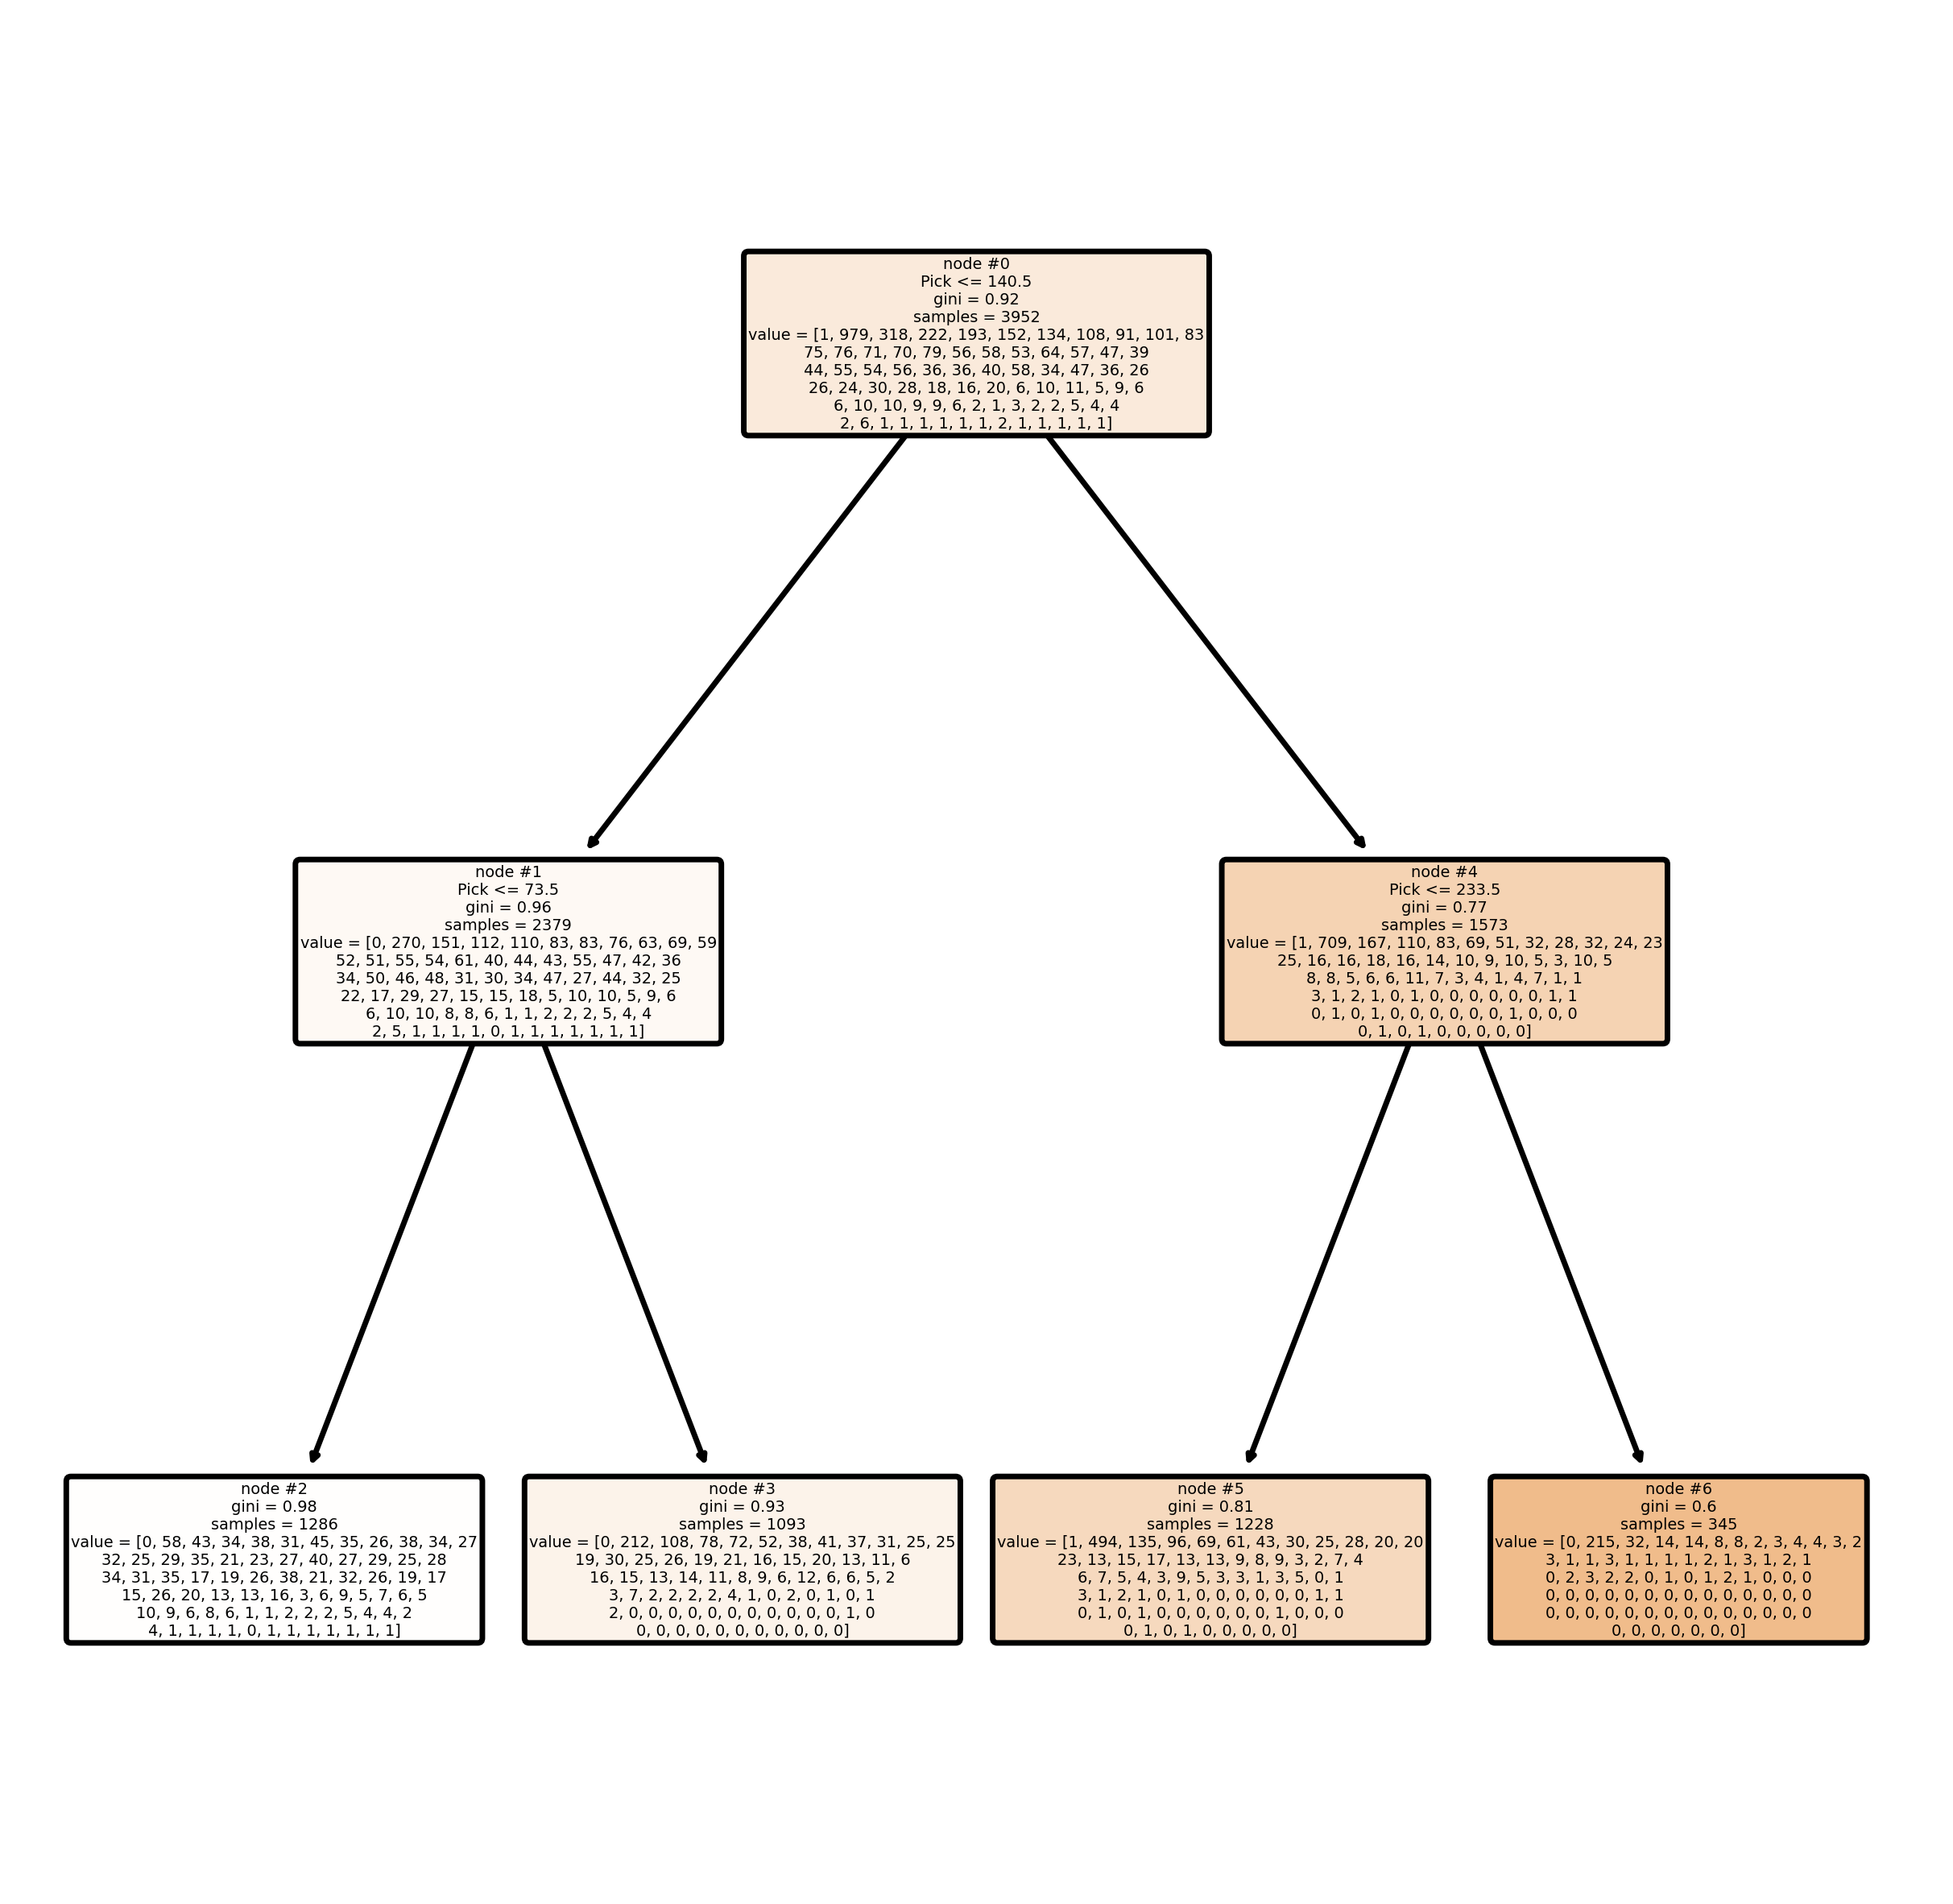

In [144]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
tree.plot_tree(classifier, feature_names = main_columns, filled=True,
               impurity=True, node_ids=True, rounded=True, precision=2) # plots the tree 